## EDA _Proyecto Final- CORE

Rol  desarrollar: 

Con el objetivo primordial de seguir conectando a pequeñas empresas (PYMES) con mercados más grandes y mejorar la experiencia del usuario, Olist los contrata como consultores externos para encontrar soluciones innovadores que permitan a sus usuarios vender sus productos a un mayor número de clientes.
Para lograrlo, les disponibiliza sus datos de 2016 a 2018 con lo que deberán entregar un MVP (minimum viable product).
____________________________________________________________________________________________________________________________________________

Consigna: 

Deben realizar un Análisis exploratorio de datos (EDA) y elaborar un reporte de calidad de datos, el criterio utilizado para su manejo, además de un diccionario de datos.

_____________________________________________________________________________________________________________________________________________

Se analizan 11 tablas provistas por Henry

Conclusión: 

- se seleccionan, de momento, todas las tablas, sin embargo se analizará en profundidad con el equipo de Machine Learning y Data Analist la semana proxima. 

- datos faltantes: 

        -   tabla 1_ closed_deals: 28 %

        -   tabla 4_ marketing_quality_leads: 0.2 %

        -   tabla 7_ order_review: 21 %
        
        -   tabla 8_ orders: 0.6 %
        
        -   tabla 9_ products: 0.01 %        


- datos duplicados:

        - tabla 3_ geolocalization: 26 % 


- analisis de id: todos los id estan normalizados y los podemos utilizar como FK a excepción de la tabla customers que presenta un doble id, del cual se analizará en profundidad y se eliminará 1 de ellos. 



_________________________________________________________________________________


## Analisis tabla a tabla 



Importo las librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt2
from scipy import stats
from scipy.stats import poisson

Creamos funcion para analizar las tablas y decidir que datos son más relevantes: 
- abrimos el csv como un dataframe de Pandas
- solicitamos una muestra para analizar si hay errores de tipeo y ver tipos de datos.
- solicitamos ver tipo de datos
- pidimos información para ver si hay o no nulos

In [2]:
#Colocamos cada URL en una variable 
url_1_closed_deals='Datasets\\olist_closed_deals_dataset.csv'
url_2_customers='Datasets\\olist_customers_dataset.csv'
url_3_geolocation='Datasets\\olist_geolocation_dataset.csv'
url_4_q_leads='Datasets\\olist_marketing_qualified_leads_dataset.csv'
url_5_order_items='Datasets\\olist_order_items_dataset.csv'
url_6_order_payments='Datasets\\olist_order_payments_dataset.csv'
url_7_order_reviews='Datasets\\olist_order_reviews_dataset.csv'
url_8_orders='Datasets\\olist_orders_dataset.csv'
url_9_products='Datasets\\olist_products_dataset.csv'
url_10_sellers='Datasets\\olist_sellers_dataset.csv'
url_11_category_name='Datasets\\product_category_name_translation.csv'

In [3]:
#abrimos los datasets en data frame de pandas 1 por tabla
df1_closed_deals= pd.read_csv(url_1_closed_deals)
df2_customers=pd.read_csv(url_2_customers)
df3_geolocation=pd.read_csv(url_3_geolocation)
df4_q_leads=pd.read_csv(url_4_q_leads)
df5_order_items=pd.read_csv(url_5_order_items)
df6_order_payments=pd.read_csv(url_6_order_payments)
df7_order_reviews=pd.read_csv(url_7_order_reviews)
df8_orders=pd.read_csv(url_8_orders)
df9_products=pd.read_csv(url_9_products)
df10_sellers=pd.read_csv(url_10_sellers)
df11_category_name=pd.read_csv(url_11_category_name)

### Formulas
Se definen las formulas necesarias para el EDA

In [4]:
#funcion para ver información general
def eda_general(df):
    return df.info(), #df.describe(), df.shape

In [5]:
#funcion para generar muestras 
def eda_sample(df):
    return df.sample(5)

In [6]:
#funcion para contar duplicados 
def eda_duplicados(df):
    duplicated_count = df.duplicated().sum()
    if duplicated_count == 0:
        return 'No hay duplicados'
    else: 
        return 'Hay {} registros duplicados'.format(duplicated_count)

In [7]:
def duplicados_x_columna(df):
    for i in df.columns:
        print(f'La columna {i} tiene: {len(df[i])-len(df[i].unique())} valores duplicados, de un total de {len(df[i])} datos')

In [8]:
#Se ven los datos de cada columna como valores únicos para detectar anomalías en el texto o letras entre los numeros, etc.
def eda_unicos_all(df): 
   lista_final=[]
   no_lista=['mql_id', 'seller_id', 'declared_product_catalog_size', 'won_date', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'seller_id', 'sdr_id', 'sr_id','customer_id', 'customer_unique_id','customer_zip_code_prefix', 'geolocation_zip_code_prefix','geolocation_lat','geolocation_lng','landing_page_id','product_id']
   for i in df.columns:
    if i not in no_lista:
        m= df[i].unique()
        print (f' - La columna {i} tiene los siguientes datos {m} \n')


In [9]:
# Se cuentan los valores de la columna order_id que tengan un largo de 32 caracteres
def homogeneidad_id(df):
    no_lista=['order_id', 'review_id', 'mql_id', 'seller_id', 'seller_id', 'sdr_id', 'sr_id','customer_id', 'customer_unique_id','landing_page_id','product_id'] 
    for i in df.columns:
        if i in no_lista:
            if len(df[i][df[i].str.len() == 32]) == len(df[i]):
                print(f'Todos los valores de {i} tienen longitud de 32 caracteres')
            else:
                print('Hay valores que NO tienen 32 caracteres')

In [10]:
#contamos los valores unicos en % del total de valores
def count_val_procentaje(df,columna):
    return round((((df[columna].value_counts())/(df[columna].count()))*100))

In [11]:
#analisis de outliers
def eda_outliers(df,columna):
   z_scores = (df[columna] - df[columna].mean()) / df[columna].std()
   threshold = 3
   outliers = df[np.abs(z_scores) > threshold]
   return outliers

In [12]:
# % de outliers
def porcentaje_outliers(df,columna):
   z_scores = (df[columna] - df[columna].mean()) / df[columna].std()
   threshold = 3
   outliers = df[np.abs(z_scores) > threshold]
   n=outliers.shape
   a=df.shape
   m=(n[0]/a[0])*100
   return  f'el % de outliers de la columna {columna} es de: {round(m)}%'

In [13]:
#grafico del boxplot de outliers
def grafico_boxplot(df,columna):
    green_diamond = dict(markerfacecolor='g', marker='D')
    fig1, ax1 = plt2.subplots()
    ax1.set_title('Changed Outlier Symbols')
    ax1.boxplot(df[columna], flierprops=green_diamond)

In [14]:
#grafico de distribución de los outliers
def histograma_outliers(df,columna):
    z_scores = (df[columna] - df[columna].mean()) / df[columna].std()
    threshold = 3
    outliers = df[np.abs(z_scores) > threshold]

    outliers[columna].astype(float)
    sns.histplot(outliers[columna],bins=25)

________________________________________________________________________________________


Analisis de información general y duplicados con las formulas propuesta, tabla por tabla, en casos particulares de analisis por columnas se comenta en el código. 

- Para un primer vistazo general el comnado .sample(5) es mejor que el head() ya que permite ver registros de toda la tabla y cada vez que se ejecuta muestra aleatoriamente registros de toda la columna. 

## TABLA 1_ Recopila información de los acuerdos comerciales cerrados por Olist (closed_deals)

In [15]:
#información general y miramos si hay duplicados y cuantos 
eda_general(df1_closed_deals)
eda_duplicados(df1_closed_deals)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

'No hay duplicados'

Del analisis de sample surge la necesidad de estudiar los valore únicos de las siguientes columnas con el objetivo de estudiar su significado y tipo de dato. 
Conceptos importantes: Un lead es una persona o empresa que haya expresado interés en los productos o servicios.

La empresa proporcionó el significado de las columnas:

- `mql_id:` identificador unico de "Clientes potenciales calificados de marketing".
- `seller_id:` identificador único del vendedor.  
- `sdr_id:` identificador de  representante de desarrollo de ventas. El SDR ayuda a confirmar algunas informaciones y programar una consultoría.  
- `sr_id:` identificador de Representante de Ventas. El SR puede cerrar el trato (el cliente potencial se registra) o perder el trato (el líder se va sin iniciar sesión).  
- `won_date:` fecha en que se cerró el trato.  
- `business_segment:` segmento del mercado en el que se va a desarrollar sus ventas.  
- `lead_type:` estos valoresindican diferentes tipos o categorías de leads.  

- `lead_behaviour_profile:` Perfil de comportamiento del cliente potencial (SDR lo identifica al contacto)

 - `has_company:` ¿El lead tiene una empresa (documentación formal)?

 - `has_gtin:` ¿El cliente potencial tiene un Número de artículo comercial global (código de barras) para sus productos?

 - `average_stock:` stock promedio declarado por lead (Informado al contacto)

 - `business_type:` tipo de negocio (revendedor/fabricante, etc.)

 - `declare_product_catalog_size:` Tamaño de catálogo declarado del lead (Informado en el contacto)

 - `declare_monthly_revenue:` Ingresos mensuales estimados declarados por el cliente potencial (Informado al contactar)

In [16]:
#analisis preliminar del contenido
eda_sample(df1_closed_deals)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
78,17c77fd570aa86b74387fae66d9d4edd,3e35a8bb43569389d3cebef0ce820f69,de63de0d10a6012430098db33c679b0b,4ef15afb4b2723d8f3d81e51ec7afefe,2018-01-18 11:09:00,food_drink,industry,NaN,NaN,NaN,NaN,reseller,NaN,0.0
654,ec2f34a30d5b87ed1d3e9de2741ddabc,246eefbebdc0c11402ec404e1589de43,0a0fb2b07d841f84fb6714e35c723075,85fc447d336637ba1df43e793199fbc8,2018-05-11 16:16:13,health_beauty,online_small,eagle,NaN,NaN,NaN,manufacturer,NaN,0.0
511,dada30935bcfc75c69e651430ea8815f,f2c87addc7e39e1c73457c4ec85ed728,33dd30594303eb0ebe12a556d612c437,4b339f9567d060bcea4f5136b9f5949e,2018-09-27 17:36:04,bed_bath_table,online_medium,cat,False,True,50-200,reseller,85.0,0.0
260,90d2301e323b1809708324229782def2,77e81c45f03c23a7b43dbb0bdd905dff,de63de0d10a6012430098db33c679b0b,fbf4aef3f6915dc0c3c97d6812522f6a,2018-01-12 13:49:28,health_beauty,online_small,NaN,NaN,NaN,NaN,manufacturer,NaN,0.0
246,867b587b7c0da5f1af73b47803e60859,d65d93b215feab3f997441e1e0a98ca5,a8387c01a09e99ce014107505b92388c,068066e24f0c643eb1d089c7dd20cd73,2018-05-14 19:26:01,computers,offline,cat,NaN,NaN,NaN,reseller,NaN,0.0


<AxesSubplot:xlabel='declared_monthly_revenue', ylabel='Count'>

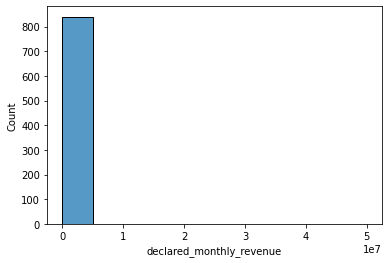

In [17]:
#nos interesó analizar los datos declarados de ingresos con el objetivo de si podríamos utilizarlos a futuro en una analisis: 
df1_closed_deals['declared_monthly_revenue'].astype(int)
sns.histplot(df1_closed_deals['declared_monthly_revenue'],bins=10)

In [18]:
#Se chequea que lo ID tengan una longitud de números homogeneos y sean todos iguales  
homogeneidad_id(df1_closed_deals)

Todos los valores de mql_id tienen longitud de 32 caracteres
Todos los valores de seller_id tienen longitud de 32 caracteres
Todos los valores de sdr_id tienen longitud de 32 caracteres
Todos los valores de sr_id tienen longitud de 32 caracteres


Con el objetivo de analizar las opciones para FK y PK se analizan los ID de la tabla, buscando cuales son únicos y cuales poseen valores repetidos

In [19]:
df1_closed_deals['sdr_id'].value_counts()

4b339f9567d060bcea4f5136b9f5949e    140
068066e24f0c643eb1d089c7dd20cd73     81
56bf83c4bb35763a51c2baab501b4c67     74
9d12ef1a7eca3ec58c545c678af7869c     66
a8387c01a09e99ce014107505b92388c     59
9e4d1098a3b0f5da39b0bc48f9876645     55
de63de0d10a6012430098db33c679b0b     53
370c9f455f93a9a96cbe9bea48e70033     51
09285259593c61296eef10c734121d5b     42
f42a2bd194f7802ab052a815c8de65b7     42
34d40cdaf94010a1d05b0d6212f9e909     41
fdb16d3cbbeb5798f2f66c4096be026d     34
b90f87164b5f8c2cfa5c8572834dbe3f     25
0a0fb2b07d841f84fb6714e35c723075     25
e7dff61b78bebffa71678e126ce669ad     13
45749fb708130f78d0db07d8d80f030b      8
9749123c950bf8363ace42cb1c2d0815      6
f6c6ab65a1c732f154b371401448be6d      3
2b63542749aa9caf15f21816da1db341      3
b34f6eba10f46bf9a657a01c108a8284      3
33dd30594303eb0ebe12a556d612c437      3
323cff2ceea1814239bc2c7e614d260d      3
6aa3b86a83d784b05f0e37e26b20860d      2
0cdad77786224a7cefea567b8c75c3c1      2
084b6fbb10729ed4da8c3d3f5a3ae7c9      1


In [20]:
df1_closed_deals['seller_id'].value_counts()

2c43fb513632d29b3b58df74816f1b06    1
c092292535a57dacd95a8765f5518f87    1
de83e0600df76319c24c3670ebcb2d5f    1
85182120f8a3331fcddb54f27a77dda2    1
bb219facd42c2384181e8f3330b42df9    1
                                   ..
76bf0e3e7d311d9069d4512cc1a232d7    1
4ff8d644ff76721b86fdc7c75c48d4a6    1
59ddca14932ec5557c099a51c4d5a58e    1
8c9348f33ae3dada25c99c99ade2af78    1
1bba9c94eb5c4e82fba9f7286fe81025    1
Name: seller_id, Length: 842, dtype: int64

In [21]:
df1_closed_deals['mql_id'].value_counts()

5420aad7fec3549a85876ba1c529bd84    1
c92c413cead7d8b67a89850ba352e1d1    1
8df878a8e746bb16f57beaa0615b5693    1
07c70f3b440791aa82c370d17910f32f    1
bf38970e96dee81ef0b4b76c2feb1a2a    1
                                   ..
6bdffb19c15963b8e630b6a1861b477f    1
834e43588167648b6f83961cf22f940e    1
688026f6edb29cc7c96b287b186b03c9    1
439c56de17208ac25a2abee9beca46f7    1
8a6492305a5fbcdcdd1a7f5a90764c07    1
Name: mql_id, Length: 842, dtype: int64

In [22]:
df1_closed_deals['sr_id'].value_counts()

4ef15afb4b2723d8f3d81e51ec7afefe    133
d3d1e91a157ea7f90548eef82f1955e3     82
6565aa9ce3178a5caf6171827af3a9ba     74
85fc447d336637ba1df43e793199fbc8     64
495d4e95a8cf8bbf8b432b612a2aa328     63
fbf4aef3f6915dc0c3c97d6812522f6a     59
2695de1affa7750089c0455f8ce27021     59
de63de0d10a6012430098db33c679b0b     53
9ae085775a198122c5586fa830ff7f2b     51
c638112b43f1d1b86dcabb0da720c901     36
060c0a26f19f4d66b42e0d8796688490     32
068066e24f0c643eb1d089c7dd20cd73     27
a8387c01a09e99ce014107505b92388c     26
9e4d1098a3b0f5da39b0bc48f9876645     24
56bf83c4bb35763a51c2baab501b4c67     24
34d40cdaf94010a1d05b0d6212f9e909     10
4b339f9567d060bcea4f5136b9f5949e      9
9749123c950bf8363ace42cb1c2d0815      7
9d12ef1a7eca3ec58c545c678af7869c      6
0a0fb2b07d841f84fb6714e35c723075      1
b90f87164b5f8c2cfa5c8572834dbe3f      1
6aa3b86a83d784b05f0e37e26b20860d      1
Name: sr_id, dtype: int64

aquí vimos que la mayoría de los clientes declaran ingreso 0, por lo que a continuación quisimos saber que tan desbalanceada esta esta columna

In [23]:
#se muestra la representatividad de los datos de la columna, en % 
count_val_procentaje(df1_closed_deals,'declared_monthly_revenue')

0.0           95.0
100000.0       1.0
20000.0        0.0
30000.0        0.0
10000.0        0.0
25000.0        0.0
15000.0        0.0
120000.0       0.0
50000.0        0.0
60000.0        0.0
300000.0       0.0
5000.0         0.0
250000.0       0.0
210000.0       0.0
8000000.0      0.0
40000.0        0.0
50000000.0     0.0
4000.0         0.0
150000.0       0.0
6.0            0.0
1000.0         0.0
180000.0       0.0
500000.0       0.0
130000.0       0.0
6000.0         0.0
8000.0         0.0
200000.0       0.0
Name: declared_monthly_revenue, dtype: float64

In [24]:
#analisis de las categorías de la columna 
count_val_procentaje(df1_closed_deals,'lead_behaviour_profile')

cat            61.0
eagle          18.0
wolf           14.0
shark           4.0
cat, wolf       1.0
eagle, wolf     0.0
eagle, cat      0.0
shark, cat      0.0
shark, wolf     0.0
Name: lead_behaviour_profile, dtype: float64

Este factor esta relacionado con DISC* https://www.discprofile.com/what-is-disc/overview/

Los perfiles de los animales expresan las siguientes características de las empresas que generaron el lead 

Shark - Dominancia

Eagle - Influencia

Cat - Estabilidad

Wolf - Conciencia

*es una herramienta de evaluación personal utilizada para mejorar el trabajo en equipo, la comunicación y la productividad en el lugar de trabajo.

In [25]:
#analizamos cuantos valores nan hay
df1_closed_deals['lead_type'].isnull().sum()

6

In [26]:
#se muestra las datos de la columna y su representatividad, en % 
count_val_procentaje(df1_closed_deals,'lead_type')

online_medium      40.0
online_big         15.0
industry           15.0
offline            12.0
online_small        9.0
online_beginner     7.0
online_top          2.0
other               0.0
Name: lead_type, dtype: float64

Esta columna es de gran utilidad para los data analist porque deja ver el % de categorias de cliente donde se pueden inferir los pertenecientes al segmento PYMEs

In [27]:
#analisis de las categorías de la columna 
df1_closed_deals['has_company'].unique()

array([nan, True, False], dtype=object)

La siguientes columna refiere a la documentación presentada por el interesado, con respecto a si posee o no una empresa: 

In [28]:
#analisis de las categorías de la columna 
count_val_procentaje(df1_closed_deals,'has_gtin')

True     84.0
False    16.0
Name: has_gtin, dtype: float64

Este punto responde a si posee o no codigo de barras en sus productos

In [29]:
#analisis de las categorías de la columna 
count_val_procentaje(df1_closed_deals,'average_stock')

5-20       33.0
50-200     23.0
1-5        15.0
20-50      12.0
200+       11.0
unknown     6.0
Name: average_stock, dtype: float64

In [30]:
#analizamos cuantos valores 'unknown' (que no saben el stock) hay
df1_closed_deals.apply(lambda x: x ['average_stock'] == 'unknown', axis=1).value_counts()


False    838
True       4
dtype: int64

In [31]:
#analizamos cuantos valores nan hay
df1_closed_deals['average_stock'].isnull().sum()

776

Solo 4 clientes desconocen el stock pero 776 casilleros de dicha columna, estan vacios. Esta columna NO sirve mucho si se quisiera analizar optimización en la gestión de stock

In [32]:
#analisis de las categorías de la columna 

count_val_procentaje(df1_closed_deals,'business_type')

reseller        71.0
manufacturer    29.0
other            0.0
Name: business_type, dtype: float64

<AxesSubplot:xlabel='declared_product_catalog_size', ylabel='Count'>

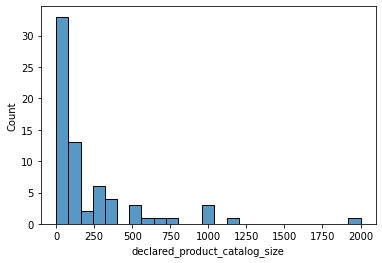

In [33]:
#analisis de la distribución de los datos 

df1_closed_deals['declared_product_catalog_size'].astype(float)
sns.histplot(df1_closed_deals['declared_product_catalog_size'],bins=25)


<AxesSubplot:xlabel='declared_monthly_revenue', ylabel='Count'>

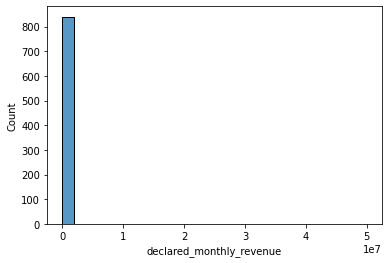

In [34]:
#analisis de la distribución de los datos 
df1_closed_deals['declared_monthly_revenue'].astype(float)
sns.histplot(df1_closed_deals['declared_monthly_revenue'],bins=25)

In [35]:
#analizamos cuantos valores 'en 0, la columna pierde valor
df1_closed_deals.apply(lambda x: x ['declared_monthly_revenue'] == 0, axis=1).value_counts()

True     797
False     45
dtype: int64

Esto nos muestra un 

Conclusiones_TABLA 1

- Esta tabla contiene la información de los acuerdos cerrados, datos de los clientes y perfil de los mismos, a la vez que lo vincula con el vendedor. 

- Si bien hay muchos valores faltantes en lo referido a información del cliente (como declaración de ingresos, stock y si presenta documentacion de la empresa) la información basica del acuerdo está dispnible asi como la fecha de cierre y segmento de mercado y perfil.  

- esta es una tabla de hecho ya que contiene información de los acuerdos cerrados. 

________________________________

## TABLA 2_ Recopila información de los clientes (customers)

In [36]:
#información general y miramos si hay duplicados y cuantos 
eda_general(df2_customers)
eda_duplicados(df2_customers)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


'No hay duplicados'

Las columnas son: 
- `customer_id:` clave para el conjunto de datos de pedidos. Cada pedido tiene un ID de cliente único.  
- `customer_unique_id:` identificador de un cliente.  
- `customer_zip_code_prefix:` código postal del cliente.  
- `customer_city:` Nombre de la ciudad del cliente.  
- `customer_state:` Estado donde vive el cliente. 

In [37]:
#analisis preliminar del contenido
eda_sample(df2_customers)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
4270,f83e78a46acb1871c42071b5d46f0301,f94096f64929f1472a2d1f2797f9fd64,5004,sao paulo,SP
81839,caf13309f13b92c0b4e19259a74566fd,72635a55dfa99b570cb2d2e3e6477737,28540,cordeiro,RJ
24674,9b16b471e3270abd75d0f6b873298f2e,d0b458bb3ef3bab46a244c6420976304,26520,nilopolis,RJ
23897,ec4ec2c0dab7654bfd6beaa39e319f50,25b2ad57752bcb3f5f2f82a4624cbc96,5641,sao paulo,SP
80262,10ad09201fcc1c82d181ff7234bcdb3b,94742cd1fbac9146be7e2a139b63e13c,69900,rio branco,AC


In [38]:
#Se chequea que lo ID tengan una longitud de números homogeneos y sean todos iguales  
homogeneidad_id(df2_customers)

Todos los valores de customer_id tienen longitud de 32 caracteres
Todos los valores de customer_unique_id tienen longitud de 32 caracteres


In [39]:
#Analisis de los valores repetidos por columna 
duplicados_x_columna(df2_customers)

La columna customer_id tiene: 0 valores duplicados, de un total de 99441 datos
La columna customer_unique_id tiene: 3345 valores duplicados, de un total de 99441 datos
La columna customer_zip_code_prefix tiene: 84447 valores duplicados, de un total de 99441 datos
La columna customer_city tiene: 95322 valores duplicados, de un total de 99441 datos
La columna customer_state tiene: 99414 valores duplicados, de un total de 99441 datos


<AxesSubplot:xlabel='customer_state', ylabel='Count'>

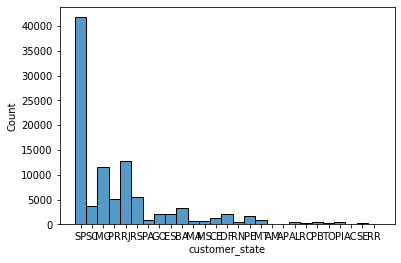

In [40]:
#se quiere saber que Estados distintos figuran en la columna customer_state
sns.histplot(df2_customers['customer_state'],bins=25)

In [41]:
#se representa lo mismo que el histograma en % para ver claramente los estados principales
count_val_procentaje(df2_customers,'customer_state')

SP    42.0
RJ    13.0
MG    12.0
RS     5.0
PR     5.0
SC     4.0
BA     3.0
DF     2.0
ES     2.0
GO     2.0
PE     2.0
CE     1.0
PA     1.0
MT     1.0
MA     1.0
MS     1.0
PB     1.0
PI     0.0
RN     0.0
AL     0.0
SE     0.0
TO     0.0
RO     0.0
AM     0.0
AC     0.0
AP     0.0
RR     0.0
Name: customer_state, dtype: float64

In [42]:
lista=df2_customers['customer_city'].unique()
lista.sort()
for i in lista: 
    print (i)

abadia dos dourados
abadiania
abaete
abaetetuba
abaiara
abaira
abare
abatia
abdon batista
abelardo luz
abrantes
abre campo
abreu e lima
acaiaca
acailandia
acajutiba
acarau
acari
acegua
acopiara
acreuna
acu
acucena
adamantina
adhemar de barros
adolfo
adrianopolis
adustina
afogados da ingazeira
afonso claudio
afranio
agisse
agrestina
agrolandia
agronomica
agua boa
agua branca
agua clara
agua comprida
agua doce
agua doce do norte
agua fria de goias
agua limpa
agua nova
agua preta
agua santa
aguai
aguas belas
aguas claras
aguas da prata
aguas de lindoia
aguas de santa barbara
aguas de sao pedro
aguas formosas
aguas frias
aguas lindas de goias
aguas mornas
aguas vermelhas
agudo
agudos
aguia branca
aimores
aiuaba
aiuruoca
ajapi
ajuricaba
alagoa
alagoa grande
alagoa nova
alagoinha
alagoinhas
alambari
alcantara
alcinopolis
alcobaca
alegre
alegrete
alegrete do piaui
alegria
alem paraiba
alexandra
alexandria
alexandrita
alexania
alfenas
alfredo chaves
alfredo marcondes
alfredo vasconcelos
alfred

In [43]:
# se analizan las columnas 1 a 1 para corroborar que no haya datos mal escritos

In [44]:
df2_customers.loc[df2_customers['customer_city'] == "arraial d ajuda"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
57498,11a10448e2adeaa0f579ccd356a6a3f1,02d50470ba933abc280ae8815ae03d74,45816,arraial d ajuda,BA


In [45]:
df2_customers.loc[df2_customers['customer_city'] == "arraial d'ajuda"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
4055,2a395e7e1901e07fff39a55249a210eb,5cc6393278c1a5bc536b2fee3d13c502,45816,arraial d'ajuda,BA
8980,8d35d30d13d298189f5800e7be43739d,2b84aa7dd6e854a4bc775fbc095504ee,45816,arraial d'ajuda,BA
11147,71ac7ff106160c3efd7f1fe76ddb461e,2ad5c989cdbc90ca393b3b3cd2cdc19b,45816,arraial d'ajuda,BA
11312,db0e8a0fae0cbc202a1593ef422fbd45,f1749f9d66c8984c53fa9ed697ae21bb,45816,arraial d'ajuda,BA
30739,d34341f5b5a77c0a6af01365d9608371,8aba68ad39962f7b25c2b7ac62ac4c0e,45816,arraial d'ajuda,BA
32505,2cb2704db6efbaeb4469715793fa0f97,274f4aea3f204d2db1dad99541b05f42,45816,arraial d'ajuda,BA
38707,cce82cf61ff003ab6f98e70e92045614,b05d90572ee8f4ea44d1bc7dd09b33c3,45816,arraial d'ajuda,BA
54839,50a941fc51a3a9f527f340e481af250d,4e05499e4b649df723f401bbd48c5007,45816,arraial d'ajuda,BA


In [46]:
#se debe homogeinizar los datos 

### Conclusiones_ TABLA 2: 

 - Se debe trabajar en los 2 id para dejar un único ID de cliente. 

 - Esta tabla solo vincula el id del cliente con su localización. Mediante la tabla de geolocalización podría remplazarse las tres últimas columnas por uin ID de ubicación y vincularla por un FK (foreight key) a la tabla geolocalización.

 - Esta tabla sirve potencialmente para, con vinculación con otras, realizar los KPI que involucran ubicaciones de los clientes

 - se trata de una tabla de dimensiones ya que da información de los clientes 

__________________

## TABLA 3_ Geolocalizació, Latitud y Longitud por localidad (geolocation)

In [47]:
#información general y miramos si hay duplicados y cuantos 
eda_general(df3_geolocation)
eda_duplicados(df3_geolocation)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


'Hay 261831 registros duplicados'

Las columnas son: 

- `geolocation_zip_code_prefix:` código postal.  
- `geolocation_lat:` latitud.  
- `geolocation_lng:` longitud.  
- `geolocation_city:` Nombre de la ciudad.  
- `geolocation_state:` Abreviacion del nombre del Estado. 

In [48]:
#analisis preliminar del contenido
eda_sample(df3_geolocation)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
29918,2435,-23.481085,-46.641783,sao paulo,SP
75490,4018,-23.588330,-46.640058,são paulo,SP
812426,76650,-15.920972,-49.605490,itaguari,GO
197870,8143,-23.519890,-46.388315,sao paulo,SP
237159,9732,-23.682513,-46.560786,sao bernardo do campo,SP


<AxesSubplot:xlabel='geolocation_state', ylabel='Count'>

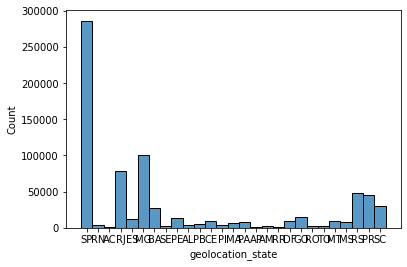

In [49]:
#se quiere saber cuantas localidades hay por estado, para esto se eliminan los duplicados en la columna customer_state
df3_aux=df3_geolocation.drop_duplicates()
sns.histplot(df3_aux['geolocation_state'],bins=25)

In [50]:
#analizamos si el codigo postal y otros datos está duplicado por columna para ver cual correlacionar para reemplazar por el ID en nuevas tablas
duplicados_x_columna(df3_aux)

La columna geolocation_zip_code_prefix tiene: 719317 valores duplicados, de un total de 738332 datos
La columna geolocation_lat tiene: 20972 valores duplicados, de un total de 738332 datos
La columna geolocation_lng tiene: 20719 valores duplicados, de un total de 738332 datos
La columna geolocation_city tiene: 730321 valores duplicados, de un total de 738332 datos
La columna geolocation_state tiene: 738305 valores duplicados, de un total de 738332 datos


In [51]:
#analisis de la columna zip code
df3_aux['geolocation_zip_code_prefix'].value_counts()

38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
90038      1
90002      1
29174      1
72230      1
45824      1
Name: geolocation_zip_code_prefix, Length: 19015, dtype: int64

In [52]:
lista=df3_geolocation['geolocation_city'].unique()
lista.sort()
for i in lista: 
    print (i)

* cidade
...arraial do cabo
4o. centenario
4º centenario
abadia de goias
abadia dos dourados
abadiania
abadiânia
abaete
abaetetuba
abaeté
abaiara
abaira
abare
abaré
abatia
abatiá
abaíra
abdon batista
abel figueiredo
abelardo luz
abrantes
abre campo
abreu e lima
abreulândia
abreus
acaiaca
acailandia
acajutiba
acara
acarape
acarau
acaraú
acari
acará
acaua
acauã
acegua
aceguá
acioli
acopiara
acorizal
acrelandia
acrelândia
acreuna
acreúna
acu
acucena
acupe
adamantina
adao colares
adelandia
adhemar de barros
adolfo
adrianopolis
adrianópolis
adustina
afogados da ingazeira
afonso arinos
afonso bezerra
afonso claudio
afonso cláudio
afonso cunha
afranio
afrânio
afua
afuá
agisse
agrestina
agricolandia
agricolândia
agrolandia
agrolândia
agronomica
agronômica
agua azul do norte
agua boa
agua branca
agua branca de minas
agua clara
agua comprida
agua doce
agua doce do maranhao
agua doce do norte
agua fria
agua fria de goias
agua limpa
agua nova
agua preta
agua santa
agua vermelha
aguai
aguanil
aguas

### Conclusiones_ TABLA 3: 

 - al momento de generar el data warehouse deben eliminarse los duplicados (26% de los datos)
 
 - Una estretégia posible al generar el data warehouse es generar un ID que permita reemplazar la información de localización en las tablas por un id que conecte directo a esta info, evitando conservar 3 columnas y duplicar información en el data warehouse. 
 
 - en la columna geolocation_id hay muchos datos mal escritos, revisar este punto y la utilidad de la tabla 
 
 - se trata de una tabla de dimensiones 


_______________


## TABLA 4_ Origen de los leads (marketing_qualified_leads)

In [53]:
#información general y miramos si hay duplicados y cuantos 
eda_general(df4_q_leads)
eda_duplicados(df4_q_leads)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


'No hay duplicados'

Las columnas son: 

- `mql_id:` identificador unico de "Clientes potenciales calificados de marketing".  
- `first_contact_date:` fecha del primer contacto con el anuncio de olist.  
- `landing_page_id:` destino al que fue al hacer click en el anuncio.  
- `origin:` tipo de marketing que se uso (organico, pago, etc.).  

In [54]:
#analisis preliminar del contenido
eda_sample(df4_q_leads)

,mql_id,first_contact_date,landing_page_id,origin
3036,ed2778e8d8cc95fc48592e71a3341841,2018-04-20,649b7b8b46b254497e92038d88f6ced8,social
6555,bb5e2c8c1c4b94480182b27de9e59821,2018-02-06,40dec9f3d5259a3d2dbcdab2114fae47,paid_search
1553,f0adba5e5ab49b4bcc17febff2d1c7bd,2018-05-21,9fa37f5177115156b1814ffc237402a6,paid_search
2248,3d3156f5541daae6744fdcf2e27a099f,2018-04-30,30534107aa0013db92899c96a1017d0b,social
653,b5464187e768a1db895e5df954d66a04,2018-01-23,ce1a65abd0973638f1c887a6efcfa82d,email


In [55]:
homogeneidad_id(df4_q_leads)

Todos los valores de mql_id tienen longitud de 32 caracteres
Todos los valores de landing_page_id tienen longitud de 32 caracteres


In [56]:
#se muestra la representatividad de los datos de la columna, en % 
count_val_procentaje(df4_q_leads,'origin')

organic_search       29.0
paid_search          20.0
social               17.0
unknown              14.0
direct_traffic        6.0
email                 6.0
referral              4.0
other                 2.0
display               1.0
other_publicities     1.0
Name: origin, dtype: float64

### Conclusiones_ TABLA 4: 

 -  Si bien hay 60 valores nulos en la columna de origen, solo representa el 0,2% de los valores y proporciona información fundamental de cuando fue el primer contacto y cual fue el origien de este. 
 - tabla de dimensiones contiene información de los potenciales clientes 

_______________________

## TABLA 5_ Información de los items de las ordenes (order_items)

In [57]:
#información general y miramos si hay duplicados y cuantos 
eda_general(df5_order_items)
eda_duplicados(df5_order_items)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


'No hay duplicados'

Las columnas son: 

- `order_id:` identificador único del pedido.  
- `order_item_id:` número secuencial que identifica el número de artículos incluidos en el mismo pedido.  
- `product_id:` identificador único del producto.  
- `seller_id:` identificador único del vendedor.  
- `shipping_limit_date:` muestra la fecha límite de envío del vendedor para entregar el pedido al socio logístico.  
- `price:` precio del articulo.  
- `freight_value:` precio del flete del articulo. 

In [58]:
#analisis preliminar del contenido
eda_sample(df5_order_items)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
71466,a2fb909612baaffa7ffa754be0db303f,1,e0bdfa15e49283425504297eb6f95928,dd7ddc04e1b6c2c614352b383efe2d36,2018-04-09 22:55:09,29.90,17.93
16552,25e23f5fbf3139c628fe56c126c97391,1,429e7401fafb76436f15e86498bd7364,da8622b14eb17ae2831f4ac5b9dab84a,2018-05-18 10:38:34,199.90,13.83
80819,b7c3dc0093239be66c61081692c5ead2,1,f89d2b130b571d24532514dca6fee2a8,8b321bb669392f5163d04c59e235e066,2017-12-15 17:31:26,13.65,7.78
100756,e475e7ce217d2a677451521dce3d35d2,1,03bb06cda40712fb8473f7962fb7d198,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-01 15:58:51,144.90,21.50
31257,46e4d123d255804919f2b94c04130164,1,1cbae91a0159b540e3d3a43193d3e970,ececbfcff9804a2d6b40f589df8eef2b,2018-01-18 15:29:03,81.25,12.07


In [59]:
#se chequea que esten bien los datos de id en longitud y homogeneidad
homogeneidad_id(df5_order_items)

Todos los valores de order_id tienen longitud de 32 caracteres
Todos los valores de product_id tienen longitud de 32 caracteres
Todos los valores de seller_id tienen longitud de 32 caracteres


<AxesSubplot:xlabel='order_item_id', ylabel='Count'>

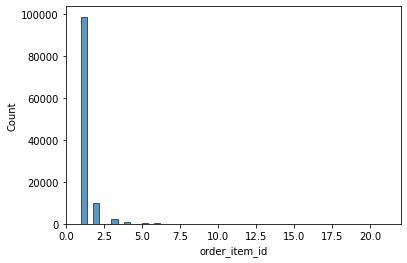

In [60]:
#nos interesó analizar la distribución de los datos para entender más de esta columna
df5_order_items['order_item_id'].astype(int)
sns.histplot(df5_order_items ['order_item_id'],bins=50)

Esta columna se interpreta como la cantidad de items por orden 

<AxesSubplot:xlabel='price', ylabel='Count'>

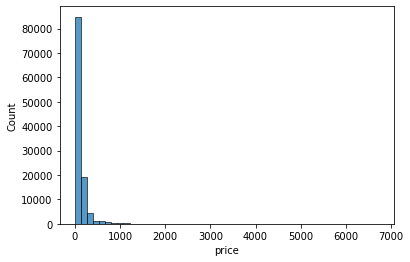

In [61]:
#nos interesó analizar la distribución de los precios 
sns.histplot(df5_order_items ['price'],bins=50)

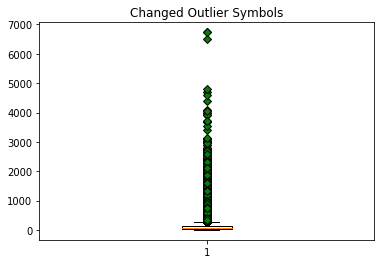

In [62]:
#graficamos la columna price para analizar si hay outliers
grafico_boxplot(df5_order_items,'price')

In [63]:
#extraemos los outliers para analizarlos en profundidad, y contarlos
eda_outliers(df5_order_items,'price')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
39,0017afd5076e074a48f1f1a4c7bac9c5,1,fe59a1e006df3ac42bf0ceb876d70969,25c5c91f63607446a97b143d2d535d31,2017-04-24 22:25:19,809.10,44.29
322,00c9474e0334f7a4ffc8c3a8bd21a51e,1,4b2653088591de362e6ba85b4a474c75,610f72e407cdd7caaa2f8167b0163fd8,2018-05-10 15:50:46,1050.61,25.13
344,00d2559e61b9a0744a0552c35c5ecccb,1,44fc450365728c413fefc547592626be,b839e41795b7f3ad94cc2014a52f6796,2018-06-13 12:57:03,849.00,23.52
475,011a43bc9bb525517251ebb3ebc99b69,1,ca7966fa77959536468be3c6ce1f19e1,610f72e407cdd7caaa2f8167b0163fd8,2018-05-03 18:09:38,899.00,21.20
...,...,...,...,...,...,...,...
112324,ff2d25d8b1b734099dee10e90e23a2ab,1,98fe8fcab3c57495e05a61bf5946f2a0,b2ac621f0d0322434d04a12b078b9369,2017-10-17 12:56:16,935.00,31.58
112343,ff36cbc44b8f228e0449c92ef089c843,1,43944a8f8f0b7ae86b6c3d3c2f257375,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-11-30 20:51:36,699.00,57.49
112449,ff85c3e4329457e83cb474799a257ccc,1,144266e1585320d057797a369596bb8b,850f4f8af5ea87287ac68de36e29107f,2018-01-24 16:57:45,899.00,17.50
112557,ffc49b9c9d666410e9ecdb0a3efadb9c,1,f96ff9b997681965689f78bef092fdd9,2a5b78b41cd05baeac8df54c6606b92c,2018-06-05 19:56:23,765.00,27.06


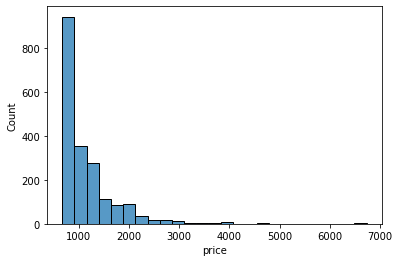

In [64]:
#graficamos la distribución de los outliers
histograma_outliers(df5_order_items,'price')

In [65]:
#aparentemente habría muchos datos con valores muy bajos, 
# por eso: analizamos los % de datos unicos
count_val_procentaje(df5_order_items,'price')

59.90      2.0
69.90      2.0
49.90      2.0
89.90      1.0
99.90      1.0
          ... 
1369.90    0.0
108.24     0.0
1224.99    0.0
24.52      0.0
736.00     0.0
Name: price, Length: 5968, dtype: float64

<AxesSubplot:xlabel='freight_value', ylabel='Count'>

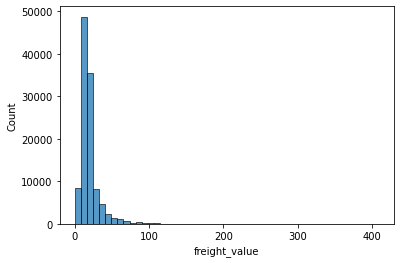

In [66]:
#nos interesó analizar la distribución de los costos de transporte
sns.histplot(df5_order_items ['freight_value'],bins=50)

In [67]:
# y la distribución % de los valores 
count_val_procentaje(df5_order_items,'freight_value')

15.10    3.0
7.78     2.0
14.10    2.0
11.85    2.0
18.23    1.0
        ... 
57.83    0.0
80.47    0.0
70.92    0.0
42.85    0.0
6.37     0.0
Name: freight_value, Length: 6999, dtype: float64

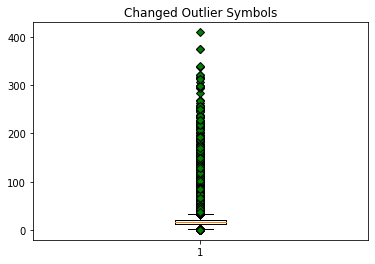

In [68]:
#graficamos la columna price para analizar si hay outliers
grafico_boxplot(df5_order_items,'freight_value')

In [69]:
#extraemos los outliers para analizarlos en profundidad, y contarlos
eda_outliers(df5_order_items,'freight_value')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
124,00471463a6106056c1a2a809f70de640,1,9df0e8a7eef2a38b74e6d5c0e224b11f,7c67e1448b00f6e969d365cea6b010ab,2017-10-03 22:46:14,179.99,85.97
162,0066a1fdaee16ad5022c5ef979d0b661,1,2fb0efd1f61f186ffdda9e8ec70f27f2,1d8dbc4f32378d715c717c1c1fc57bae,2018-06-14 20:17:26,139.00,87.28
186,0078a358a14592b887eb140ef515f5ab,1,722f84416177a451c3be217ef8ffa082,cca3071e3e9bb7d12640c9fbe2301306,2017-11-10 15:55:43,253.52,82.86
313,00c47fefb9a49baec12ab3654d7f548e,1,f196248e8b5d060cca414a664ea9a76f,91f0eec23d4a61d7d7caeefa3f0ad1ca,2017-12-13 00:18:33,199.00,67.69
...,...,...,...,...,...,...,...
112083,fe9fc8eb3ad784aaf13c6788561efe59,1,9041a4cde4a900bc259d3b1b6847f6b1,1025f0e2d44d7041d6cf58b6550e0bfa,2018-08-17 12:44:26,120.00,74.79
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
112359,ff3e501f56dcf0752578d86df833558f,1,608af629c5b520efe1caf06e1cfc4abc,5dceca129747e92ff8ef7a997dc4f8ca,2017-10-27 21:14:33,299.90,170.11
112450,ff85f6534f8a6b89e27a340dcf86ecac,1,e7f85e7f0203b7b95cc1b4c21b4b070c,ceaec5548eefc6e23e6607c5435102e7,2018-05-14 16:38:18,259.99,84.52


In [70]:
porcentaje_outliers(df5_order_items,'freight_value')

'el % de outliers de la columna freight_value es de: 2%'

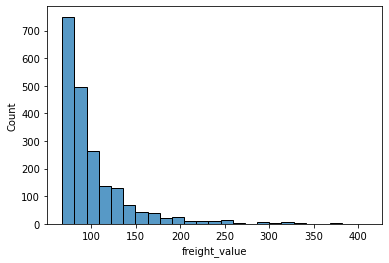

In [71]:
#graficamos la distribución de los outliers
histograma_outliers(df5_order_items,'freight_value')

### Conclusiones_ TABLA 5: 

 - Esta es una tabla MUY util porque vincula los id de producto , orden y vendedor con el costo de envío y el costo de transporte. 
 - Es una columna de dimensión 

_____________

## TABLA 6_ Información de pago de las ordenes (order_payments)

In [72]:
#información general 
eda_general(df6_order_payments)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


(None,)

In [74]:
df6_order_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [ ]:
#se deben limpiar los espacios 

Las columnas son: 

- `order_id:` identificador único de un pedido.  
- `payment_sequential:` un cliente puede pagar un pedido con más de un método de pago. Si lo hace, se creará una secuencia para acomodar todos los pagos.  
- `payment_type:` forma de pago elegida por el cliente.  
- `payment_installments:` número de cuotas elegidas por el cliente.  

In [ ]:
# Se revisan nulos
df6_order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
#Se ven a simple vista alguns valores únicos para detectar anomalías
eda_unicos_all(df6_order_payments)

 - La columna order_id tiene los siguientes datos ['b81ef226f3fe1789b1e8b2acac839d17' 'a9810da82917af2d9aefd1278f1dcfa0'
 '25e8ea4e93396b6fa0d3dd708e76c1bd' ... '32609bbb3dd69b3c066a6860554a77bf'
 'b8b61059626efa996a60be9bb9320e10' '28bbae6599b09d39ca406b747b6632b1'] 

 - La columna payment_sequential tiene los siguientes datos [ 1  2  4  5  3  8  6  7 10 11 17 19 27 12  9 15 13 14 16 25 22 26 29 28
 18 21 24 23 20] 

 - La columna payment_type tiene los siguientes datos ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined'] 

 - La columna payment_installments tiene los siguientes datos [ 8  1  2  3  6  5  4 10  7 12  9 13 15 24 11 18 14 20 21 17 22  0 16 23] 

 - La columna payment_value tiene los siguientes datos [ 99.33  24.39  65.71 ... 205.71 100.55 363.31] 



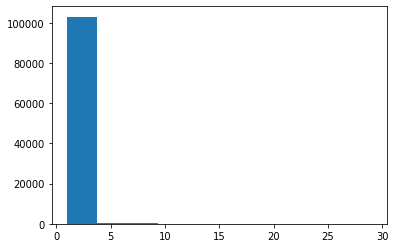

In [ ]:
plt2.hist(df6_order_payments.payment_sequential)
plt2.show()

In [ ]:
# Se cuentan valores únicos para saber si hay duplicados por columna
duplicados_x_columna(df6_order_payments)

La columna order_id tiene: 4446 valores duplicados, de un total de 103886 datos
La columna payment_sequential tiene: 103857 valores duplicados, de un total de 103886 datos
La columna payment_type tiene: 103881 valores duplicados, de un total de 103886 datos
La columna payment_installments tiene: 103862 valores duplicados, de un total de 103886 datos
La columna payment_value tiene: 74809 valores duplicados, de un total de 103886 datos


In [ ]:
# Se cuentan valores duplicados en el total del df
eda_duplicados(df6_order_payments)

'No hay duplicados'

In [ ]:
# Se cuentan los valores de la columna order_id que tengan un largo de 32 caracteres
homogeneidad_id(df6_order_payments)

Todos los valores de order_id tienen longitud de 32 caracteres


In [ ]:
#analisis preliminar del contenido
eda_sample(df6_order_payments)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
35174,e23c9dcc304042fa90d538be679fa68d,1,credit_card,2,101.27
71460,1dc1a1e530ccf4da96b6b27494cd652f,1,credit_card,8,345.40
26367,d9979ad46266bbd78c21760fd28af8ec,1,boleto,1,647.54
18465,dbb786efd821d7f903d79cb502ba3083,1,credit_card,3,176.38
53081,92744b8bd0b36fe5d9b3ea74a6edf994,1,credit_card,1,133.24


<AxesSubplot:xlabel='payment_value', ylabel='Count'>

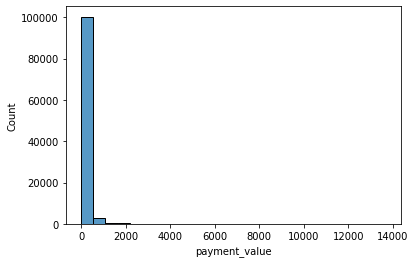

In [ ]:
df6_order_payments['payment_value'].astype(float)
sns.histplot(df6_order_payments['payment_value'],bins=25)


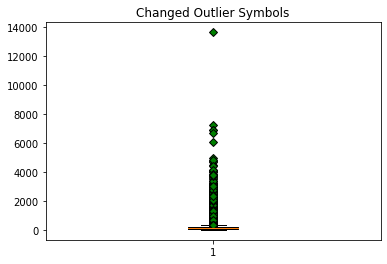

In [ ]:
grafico_boxplot(df6_order_payments, 'payment_value')

In [ ]:
eda_outliers(df6_order_payments,'payment_value')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
160,886b114d034f4ac1d39d964c1b2a8182,1,credit_card,10,2027.16
167,62d9b911d7c56cf455f660eecb8ddd3a,1,credit_card,10,1002.73
235,f86d7bc39aab05299691322044b63bb2,1,voucher,1,1302.42
247,4ff8e28200e5a7a50b448cfaaf1f8ed3,1,credit_card,10,2288.31
359,ce6d150fb29ada17d2082f4847107665,1,credit_card,10,1586.47
...,...,...,...,...,...
103622,b0b0d3285e59abf2f6c9d7e1bf761323,1,credit_card,10,3044.12
103718,fc20b8e282da6f3fbcdd3a3cedecb723,1,credit_card,10,3782.19
103733,fb2dccfadca8cd6ebddc5d10ae48d1f7,1,credit_card,3,1134.44
103783,4198c92e06d92792e49f119f659e723e,1,credit_card,10,1294.26


In [ ]:
porcentaje_outliers(df5_order_items,'price')

'el % de outliers de la columna price es de: 2%'

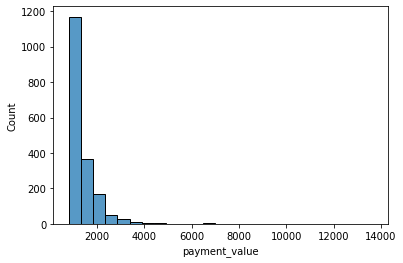

In [ ]:
histograma_outliers(df6_order_payments,'payment_value')

### Conclusiones_ TABLA 6: 
 
 - Tabla de dimension con los detalles del pago de tabla orders 

____________________

## TABLA 7_ Feedback sobre las ordenes (order_reviews)

In [ ]:
#información general y miramos si hay duplicados y cuantos 
eda_general(df7_order_reviews)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


(None,)

Las columnas son: 

- `review_id:` identificador de reseña único.  
- `order_id:` identificador único de pedido.  
- `review_score:` Nota del 1 al 5 dada por el cliente en una encuesta de satisfacción.  
- `review_comment_title:` Título del comentario de la reseña dejada por el cliente, en portugués.  
- `review_comment_message:` Mensaje de comentario de la reseña dejada por el cliente, en portugués.  
- `review_creation_date:` Muestra la fecha en que se envió la encuesta de satisfacción al cliente.  
- `review_answer_timestamp:` Muestra la marca de tiempo de la respuesta a la encuesta de satisfacción. 

In [ ]:
#se chequea el numero de valores nulos: 
df7_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
#Se ven a simple vista alguns valores únicos para detectar anomalías
eda_unicos_all(df7_order_reviews)

 - La columna review_id tiene los siguientes datos ['7bc2406110b926393aa56f80a40eba40' '80e641a11e56f04c1ad469d5645fdfde'
 '228ce5500dc1d8e020d8d1322874b6f0' ... 'b3de70c89b1510c4cd3d0649fd302472'
 '1adeb9d84d72fe4e337617733eb85149' 'efe49f1d6f951dd88b51e6ccd4cc548f'] 

 - La columna order_id tiene los siguientes datos ['73fc7af87114b39712e6da79b0a377eb' 'a548910a1c6147796b98fdf73dbeba33'
 'f9e4b658b201a9f2ecdecbb34bed034b' ... '55d4004744368f5571d1f590031933e4'
 '7725825d039fc1f0ceb7635e3f7d9206' '90531360ecb1eec2a1fbb265a0db0508'] 

 - La columna review_score tiene los siguientes datos [4 5 1 3 2] 

 - La columna review_comment_title tiene los siguientes datos [nan 'recomendo' 'Super recomendo' ... 'Não foi entregue o pedido'
 'OTIMA EMBALAGEM' 'Foto enganosa '] 

 - La columna review_comment_message tiene los siguientes datos [nan 'Recebi bem antes do prazo estipulado.'
 'Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa'
 ...
 'O p

Hay que decidir que hacer con los nulos en:
* review_comment_message
* review_comment_title

In [ ]:
# Se cuentan valores únicos para saber si hay duplicados por columna
duplicados_x_columna(df7_order_reviews)

La columna review_id tiene: 814 valores duplicados, de un total de 99224 datos
La columna order_id tiene: 551 valores duplicados, de un total de 99224 datos
La columna review_score tiene: 99219 valores duplicados, de un total de 99224 datos
La columna review_comment_title tiene: 94696 valores duplicados, de un total de 99224 datos
La columna review_comment_message tiene: 63064 valores duplicados, de un total de 99224 datos
La columna review_creation_date tiene: 98588 valores duplicados, de un total de 99224 datos
La columna review_answer_timestamp tiene: 976 valores duplicados, de un total de 99224 datos


In [ ]:
# Se cuentan valores duplicados en el total del df
eda_duplicados(df7_order_reviews)

'No hay duplicados'

In [ ]:
# Se cuentan los valores de la columna order_id que tengan un largo de 32 caracteres
homogeneidad_id(df7_order_reviews)

Todos los valores de review_id tienen longitud de 32 caracteres
Todos los valores de order_id tienen longitud de 32 caracteres


In [ ]:
#analisis preliminar del contenido
eda_sample(df7_order_reviews)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
54359,060fc6ea727c606379c5d11d6ad072cd,fac209312c95149afe74f4cbcdd87c85,3,NaN,NaN,2017-10-05 00:00:00,2017-10-10 16:22:57
6220,0c704fdd885902ea29eb9246244a4d7e,cd6764d145d06aa99b4d3e54afe203b6,4,NaN,NaN,2018-04-04 00:00:00,2018-04-17 04:07:31
19208,ce131ac619bd954f5ac75cb59c236a51,8c344483ffcca752c510429c0923b85b,5,NaN,NaN,2017-11-11 00:00:00,2017-11-12 19:44:09
51006,0a67648051de8aa084b6fe13ca1d55b7,cb7e54b683ab7303fa52e2c3975801a6,4,NaN,NaN,2018-08-11 00:00:00,2018-08-11 21:14:35
25538,2466124cf9255bf9e281efbf9064fac0,11837ac14fcdfb163c0b78d91be89498,4,NaN,NaN,2016-11-17 00:00:00,2016-11-20 23:30:03


In [ ]:
#analizamos los datos de título de resenas

m=df7_order_reviews['review_comment_title'].sort_values()
f=m.unique()
f.astype(str)
for i in f: 
    print(i)

In [ ]:
#analizamos los datos de mensaje de resenas
m=df7_order_reviews['review_comment_message'].sort_values()
f=m.unique()
f.astype(str)
for i in f: 
    print(i)

In [ ]:
#hay un GRAN NÚMERO DE ERRORES, comentarios llenos de números, nombres y simbolos, tambien hay emojis
#estos son los emoji encontrados en el texto y su clasificacion: 
'''
allowed_chars_good = [💟,😉,💖,💝,🌟,😎,💋,💚,💯,🌷,😃,😊,😏,😍,🍀,😀,😘,🤗,😂,👌,👍🏼,👏,🤙🏼,🙌🏻,😀,😆,🔝,😊,😁,😊,🎁]
allowed_chars_bad = [😭,😠,😡,😱,🤔,😢,😒,😣,🤔,😩,😟]
allowed_chars_neutral= [🐕,🍀,🙏🏻,?,🎁,🏇,👧,💅]
'''

### Conclusiones_ TABLA 7: 

 - Tabla de reseñas, con FK, hacia tabla de orders. Donde cada dato es una reseña sobre cada compra.   


___________________

## TABLA 8_ Información de las ordenes (orders)

In [ ]:
#información general y miramos si hay duplicados y cuantos 
eda_general(df8_orders)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


(None,)

Las columnas son: 

- `order_id:` identificador único del pedido.  
- `customer_id:` clave para el conjunto de datos del cliente. Cada pedido tiene un ID de cliente único.  
- `order_status:` Referencia al estado del pedido (entregado, enviado, etc).  
- `order_purchase_timestamp:` Muestra la fecha de la compra.  
- `order_approved_at:` Muestra la fecha de aprobación del pago.  
- `order_delivered_carrier_date:` Muestra la fecha del pedido. Cuando se entregó al socio logístico.  
- `order_delivered_customer_date:` Muestra la fecha real de entrega del pedido al cliente.  
- `order_estimated_delivery_date:` Muestra la fecha estimada de entrega que fue informada al cliente en el momento de la compra.  

In [ ]:
#se chequean los nulos por columna  
df8_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
#Se ven a simple vista alguns valores únicos para detectar anomalías
eda_unicos_all(df8_orders)

 - La columna order_id tiene los siguientes datos ['e481f51cbdc54678b7cc49136f2d6af7' '53cdb2fc8bc7dce0b6741e2150273451'
 '47770eb9100c2d0c44946d9cf07ec65d' ... '83c1379a015df1e13d02aae0204711ab'
 '11c177c8e97725db2631073c19f07b62' '66dea50a8b16d9b4dee7af250b4be1a5'] 

 - La columna order_status tiene los siguientes datos ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved'] 



In [ ]:
# Se cuentan valores únicos para saber si hay duplicados por columna
duplicados_x_columna(df8_orders)

La columna order_id tiene: 0 valores duplicados, de un total de 99441 datos
La columna customer_id tiene: 0 valores duplicados, de un total de 99441 datos
La columna order_status tiene: 99433 valores duplicados, de un total de 99441 datos
La columna order_purchase_timestamp tiene: 566 valores duplicados, de un total de 99441 datos
La columna order_approved_at tiene: 8707 valores duplicados, de un total de 99441 datos
La columna order_delivered_carrier_date tiene: 18422 valores duplicados, de un total de 99441 datos
La columna order_delivered_customer_date tiene: 3776 valores duplicados, de un total de 99441 datos
La columna order_estimated_delivery_date tiene: 98982 valores duplicados, de un total de 99441 datos


In [ ]:
#Observamos en qué momento del estado del envío de la orden hay más nulos
for dato in df8_orders['order_status'].unique():
    print(f'Para el dato: {dato}')
    print(df8_orders[df8_orders['order_status'] == dato].isnull().sum(), '\n')

Para el dato: delivered
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64 

Para el dato: invoiced
order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     314
order_delivered_customer_date    314
order_estimated_delivery_date      0
dtype: int64 

Para el dato: shipped
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1107
order_estimated_delivery_date       0
dtype: int64 

In [ ]:
#se chequean los duplicados en general
eda_duplicados(df8_orders)

'No hay duplicados'

In [ ]:
# Se cuentan los valores de la columna order_id que tengan un largo de 32 caracteres
homogeneidad_id(df8_orders)

Todos los valores de order_id tienen longitud de 32 caracteres
Todos los valores de customer_id tienen longitud de 32 caracteres


In [ ]:
#analisis preliminar del contenido
eda_sample(df8_orders)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
8091,e32049d31df0d952f7a6f6d8243b554a,020781297fe6482b10c41bd7a105d508,delivered,2018-08-19 22:34:18,2018-08-21 05:09:40,2018-08-24 06:38:00,2018-08-27 19:18:57,2018-09-11 00:00:00
98826,4638df545f7ab35cb2e4ed4bcb490e17,2003c2365837ed9b6c7e6ec2780797b3,delivered,2017-09-07 19:35:39,2017-09-07 19:50:24,2017-09-22 16:28:50,2017-10-07 13:23:08,2017-10-05 00:00:00
9127,92544b942c20882ed536fca30fbaf86a,b6f870f9091efa3e437de8afdbbea8dc,delivered,2017-09-14 20:57:31,2017-09-16 02:50:33,2017-09-18 19:29:01,2017-09-25 22:05:55,2017-10-05 00:00:00
45877,99ea7908cd1e043462057874b180e3fe,05fa87701fb77d327e49cb5fb457a5da,delivered,2017-08-04 17:28:51,2017-08-04 17:45:15,2017-08-07 21:18:01,2017-08-10 23:36:58,2017-08-24 00:00:00
84543,a684a880595e155b09caa69ea219257f,6a43e91f4891c9b7b055cd37d1d0ed00,delivered,2018-06-10 18:51:46,2018-06-10 19:12:40,2018-06-12 16:59:00,2018-06-29 20:46:42,2018-07-04 00:00:00


### Conclusiones_ TABLA 8: 

 - Tabla de hecho, relacionada con tabla order_reviews, order_payments y order_items

_____________________________

## TABLA 9_ Información de productos (products)

In [ ]:
#información general y miramos si hay duplicados y cuantos 
eda_general(df9_products)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


(None,)

Las columnas son: 
- `product_id:` identificador único de producto.  
- `product_category_name:` categoría raíz del producto, en portugués.  
- `product_name_length:` número de caracteres extraídos del nombre del producto.  
- `product_description_length:` número de caracteres extraídos de la descripción del producto.  
- `product_photos_qty:` número de fotos publicadas del producto.  
- `product_weight_g:` peso del producto medido en gramos.  
- `product_length_cm:` longitud del producto medida en centímetros.  
- `product_height_cm:` altura del producto medida en centímetros.  
- `product_width_cm:` ancho del producto medido en centímetros.  

In [ ]:
#chequeamos nulos por columna
df9_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
#Se ven a simple vista alguns valores únicos para detectar anomalías
eda_unicos_all(df9_products)

 - La columna product_category_name tiene los siguientes datos ['perfumaria' 'artes' 'esporte_lazer' 'bebes' 'utilidades_domesticas'
 'instrumentos_musicais' 'cool_stuff' 'moveis_decoracao'
 'eletrodomesticos' 'brinquedos' 'cama_mesa_banho'
 'construcao_ferramentas_seguranca' 'informatica_acessorios'
 'beleza_saude' 'malas_acessorios' 'ferramentas_jardim'
 'moveis_escritorio' 'automotivo' 'eletronicos' 'fashion_calcados'
 'telefonia' 'papelaria' 'fashion_bolsas_e_acessorios' 'pcs'
 'casa_construcao' 'relogios_presentes'
 'construcao_ferramentas_construcao' 'pet_shop' 'eletroportateis'
 'agro_industria_e_comercio' nan 'moveis_sala' 'sinalizacao_e_seguranca'
 'climatizacao' 'consoles_games' 'livros_interesse_geral'
 'construcao_ferramentas_ferramentas' 'fashion_underwear_e_moda_praia'
 'fashion_roupa_masculina'
 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'industria_comercio_e_negocios' 'telefonia_fixa'
 'construcao_ferramentas_iluminacao' 'livros_tecnicos'
 'eletrodomesticos_2' 'a

In [ ]:
#se chequean los valores duplicados en general
eda_duplicados(df9_products)

'No hay duplicados'

In [ ]:
##se quiere analizar la categoria de products 
eda_sample(df9_products)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
14027,b0a0d47f42d23f27388952b8821a9517,moveis_decoracao,51.0,2257.0,2.0,575.0,63.0,11.0,11.0
27189,fff9553ac224cec9d15d49f5a263411f,fashion_bolsas_e_acessorios,22.0,328.0,3.0,150.0,16.0,13.0,11.0
13360,69f0f3b1c89b4e731e0b691e00bfbded,alimentos_bebidas,45.0,1796.0,4.0,300.0,16.0,16.0,16.0
28741,a9fb80187bf64d19dd2804f25e83c5e6,brinquedos,51.0,690.0,2.0,966.0,22.0,45.0,27.0
24252,12a3dba07d03c2dedf0c40d6499b55d3,moveis_decoracao,59.0,87.0,2.0,6900.0,74.0,13.0,52.0


### Conclusiones_ TABLA 9: 

 -  Tabla de dimensión con los productos y sus características.

_______________________

## TABLA 10_ Información de vendedores (sellers)

In [ ]:
#información general y miramos si hay duplicados y cuantos 
eda_general(df10_sellers)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


(None,)

Las columnas son: 

- `seller_id:` identificador único del vendedor.  
- `seller_zip_code_prefix:` código postal del vendedor.  
- `seller_city:` nombre de la ciudad del vendedor.  
- `seller_state:` estado del vendedor.

In [ ]:
# Se cuentan nulos
df10_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
#se chequean los valores duplicados en general
eda_duplicados(df10_sellers)

'No hay duplicados'

In [ ]:
#analisis preliminar del contenido
eda_sample(df10_sellers)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
599,e0487761face83d64fcada2408959a36,1021,sao paulo,SP
2605,0f94588695d71662beec8d883ffacf09,88037,florianopolis,SC
1468,6039e27294dc75811c0d8a39069f52c0,6162,osasco,SP
988,72bc2cce903c872fe376a8faaa81d237,4693,sao paulo,SP
3038,f1b854361f4e15d5851b494df66f22b2,20020,rio de janeiro,RJ


In [ ]:
# Se buscan valores anómalos
eda_unicos_all(df10_sellers)

 - La columna seller_zip_code_prefix tiene los siguientes datos [13023 13844 20031 ...  4650 96080 12051] 

 - La columna seller_city tiene los siguientes datos ['campinas' 'mogi guacu' 'rio de janeiro' 'sao paulo' 'braganca paulista'
 'brejao' 'penapolis' 'curitiba' 'anapolis' 'itirapina' 'tubarao'
 'lauro de freitas' 'imbituba' 'brasilia' 'porto seguro' 'guaruja'
 'tabatinga' 'salto' 'tres de maio' 'belo horizonte' 'arapongas'
 'sao bernardo do campo' 'tatui' 'garopaba' 'camanducaia' 'tupa'
 'guarulhos' 'sao jose dos pinhais' 'sao ludgero' 'sao jose' 'piracicaba'
 'porto alegre' 'congonhal' 'santo andre' 'osasco' 'valinhos' 'joinville'
 'saquarema' 'barra velha' 'petropolis' 'santo antonio da patrulha'
 'ponta grossa' 'santana de parnaiba' 'sao carlos' 'ibitinga' 'barueri'
 'caxias do sul' 'araguari' 'contagem' 'jaragua do sul' 'lages - sc'
 'bento goncalves' 'catanduva' 'ribeirao pires' 'jaboticabal' 'echapora'
 'cotia' 'rio do sul' 'sorocaba' 'pradopolis' 'itaborai' 'mirassol'
 'bi

In [ ]:
lista=df10_sellers['seller_city'].unique()
lista.sort()
for i in lista: 
    print (i)

04482255
abadia de goias
afonso claudio
aguas claras df
alambari
alfenas
almirante tamandare
alvares machado
alvorada
americana
amparo
ampere
anapolis
andira-pr
andradas
angra dos reis
angra dos reis rj
ao bernardo do campo
aparecida
aparecida de goiania
aperibe
apucarana
aracaju
aracatuba
araguari
arapongas
araquari
ararangua
araraquara
araras
araucaria
araxa
arinos
armacao dos buzios
arraial d'ajuda (porto seguro)
artur nogueira
aruja
arvorezinha
assis
atibaia
auriflama
auriflama/sp
avare
bady bassitt
baependi
bage
bahia
balenario camboriu
balneario camboriu
bandeirantes
barbacena
barbacena/ minas gerais
bariri
barra mansa
barra velha
barretos
barrinha
barro alto
barueri
batatais
bauru
bebedouro
belford roxo
belo horizont
belo horizonte
bento goncalves
bertioga
betim
birigui
blumenau
bocaiuva do sul
bofete
boituva
bom jardim
bom jesus dos perdoes
bombinhas
bonfinopolis de minas
borda da mata
botucatu
braco do norte
braganca paulista
brasilia
brasilia df
brejao
brotas
brusque
buritama

Se verificó que se encuentran las siguientes inconsistencias, en los datos de esta columna: 

Aparecen los siguientes datos que no corresponden a una ciudad:  '04482255' y 'vendas@creditparts.com.br'

	- 'arraial d'ajuda (porto seguro)' 
 	- carapicuiba / sao paulo

	- cariacica / es

	- jacarei / sao paulo

	- lages
	- lages - sc

	- maua
	- maua/sao paulo

	- mogi das cruses
	- mogi das cruzes
	- mogi das cruzes / sp

	- novo hamburgo
	- novo hamburgo, rio grande do sul, brasil

	- pinhais
	- pinhais/pr

	- ribeirao preto
	- ribeirao preto / sao paulo
	- ribeirao pretp
	- riberao preto

	- rio de janeiro
	- rio de janeiro / rio de janeiro
	- rio de janeiro \rio de janeiro
	- rio de janeiro, rio de janeiro, brasil

	- santa barbara d oeste
	- santa barbara d'oeste
	- santa barbara d´oeste

	- santo andre
	- santo andre/sao paulo

	- sao  jose dos pinhais
	- sao jose dos pinhais
	- sao jose dos pinhas

	- sao miguel d'oeste
	- sao miguel do oeste

	- sao  paulo
	- sao paluo
	- sao paulo
	- sao paulo - sp
	- sao paulo / sao paulo
	- sao paulo sp
	- sao paulop
	- são paulo

	- sbc
	- sbc/sp

	- sp
	- sp / sp



### Conclusiones_ TABLA 10: 

 - Tabla sin nulos y sin duplicados que referencia a los vendedores con su localización. Se relaciona con geolocation por seller_zip_code_prefix (código postal). 

________________________

## TABLA 11_ traducción de la descripción de producto (product_translation)

In [ ]:
#información general y miramos si hay duplicados y cuantos 
eda_general(df11_category_name)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


(None,)

Las columnas son: 

- `product_category_name:` nombre de categoría en portugués.   
- `product_category_name_english:` nombre de categoría en inglés.  

In [ ]:
# Se cuentan nulos
df11_category_name.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
#se cuentan los valores duplicados 
eda_duplicados(df11_category_name)

'No hay duplicados'

In [ ]:
#analisis preliminar del contenido
eda_sample(df11_category_name)

,product_category_name,product_category_name_english
3,cama_mesa_banho,bed_bath_table
15,telefonia_fixa,fixed_telephony
6,perfumaria,perfumery
16,ferramentas_jardim,garden_tools
2,automotivo,auto


### Conclusiones_ TABLA 11: 

 - Tabla ultra simple que traduce el nombre de las categorías de los productos

_______________________________________________________________


## EDA _Proyecto Final- ANALYTICS

### 1_close deals

### 2_customers

Tabla con los datos de los clientes, simple, sin NA y con datos de codigo postal, ciudad y estado. No hay domicilio particular. 

### 3_geolocation

### 4_marketing_quality_leads (4_q_leads)

Tabla que refiere al primer origen realizado a una landing page, esta puede ser social, busqueda paga, busqueda organica, email, etc.


### 5_order_items

Tabla que muestra el precio y el costo de flete. Unida con el id del producto, id del venderdor, y el order item id

### 6_order_payments

Tabla con los datos de las compras realizadas por los usuarios. con que se ha pagado, el valor del pago y cantidad de cuotas

### 7_olist_order_review

Contiene:
- detalles relacionados con las reseñas publicadas
- id orden, producto
- muchos nulos

### 8_orders (olist order data)

Contiene:
- datos de entrega de productos
- localizacion
- fechas

### 9_products

Contiene:
- datos relacionados con un producto como el ID, el nombre de la categoría y las medidas.

### 10_sellers

Contiene:
-  información relacionada con todos los vendedores que se han registrado con esta firma.
- Ubicacion, estado

### 11_category_name (product category name ) 

Contiene: 
- Nombre del producto en portugues e inglés

_____________________________


## EDA _Proyecto Final- MACHINE LEARNING

Considerando hacer un analisis de sentimientos
utilizando procesamiento de lenguaje natural, sería realmente muy complejo ya que se cuenta con pocos datos con simbolos especiales en medio del texto y las mismas estan en portugues. 

Si embargo se analiza la tabla 7 de reviews en más profundidad: 

La tabla 7 _ Reviews, posee las siguientes columnas: 

 - review_id: ID de la reseña.

 - order_id: ID de la orden asociada a la reseña.

 - review_score: Puntuación en estrellas (1 al 5).

 - review_comment_title: Título de la reseña.

 - review_comment_message: Reseña.

 - review_creation_date: Fecha de publicación de la reseña.

 - review_answer_timestamp: Fecha en la que se contestó a la reseña.

In [ ]:
#información general y miramos si hay duplicados y cuantos 
eda_general(df7_order_reviews)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


(None,)

In [ ]:
df7_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
count_val_procentaje(df7_order_reviews,'review_comment_message')

Muito bom                                                                                                                                                                                              1.0
Bom                                                                                                                                                                                                    0.0
muito bom                                                                                                                                                                                              0.0
bom                                                                                                                                                                                                    0.0
Recomendo                                                                                                                                                                                   

In [ ]:
count_val_procentaje(df7_order_reviews,'review_comment_title')

Recomendo                    4.0
recomendo                    3.0
Bom                          3.0
super recomendo              2.0
Excelente                    2.0
                            ... 
Luminaria sobrepor led 18    0.0
Não recebi.                  0.0
produto com lacre violado    0.0
Atraso Entrega               0.0
Foto enganosa                0.0
Name: review_comment_title, Length: 4527, dtype: float64

<AxesSubplot:xlabel='review_score', ylabel='Count'>

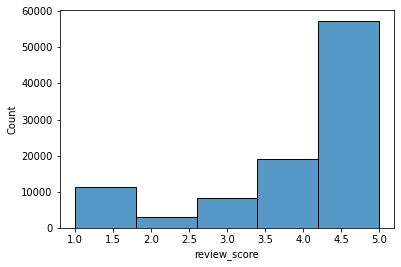

In [ ]:
sns.histplot(df7_order_reviews['review_score'],bins=5)

### GENERAL Y OTROS:

Con respecto a los outliers, tanto sea de las columnas numéricas del df5_order_item y 6_order_payments, poseen aproximadamente 2% de valores outliers cada uno con una distribución similar en todos los casos, por lo que se decide no modificar cambios sobre las tablas al respecto.  

______________________

# CONCLUSIONES DE MODIFICACIONES PARA EL ETL: 


## ETL
'''
Como conclusión del EDA, las modificaciones a realizar para obtener datos limpios para el Data Warehouse son: 

### 1_closed_deals:

 - 'won_date' _ cambio de formato a fecha hora

 Se eliminan las columnas por falta de datos suficientes (NaN o 0): 

 - 'has_gtin' 
 - 'has_company' 
 - 'average_stock' 
 - 'declared_product_catalog_size'
 - 'declared_monthly_revenue'

Se crea un nuevo id en una nueva columna que se coloca al inicio de la tabla.

 - 'closed_deals_id'

### 2_customers: 

Se elimina la columna de customer_unique_id porque no es un id único:

 -  'customer_unique_id'

### 3_geolocation:

Es una table incompleta a pesar de su dimensión ya que no tiene todos los zip_code (códigos postales) presentes en las tablas de Customers y Sellers por lo tanto será eliminada del modelo y se evaluará hacer una nueva tabla de geolocation sin latitud ni longitud, según su posible utilidad. 

### 4_marketing_q_leads:

Se pasan la siguiente columna a formato fecha hora:

 - 'first_contact_date'

### 5_order_items:

Se pasan la siguiente columna a formato fecha hora:

 - 'shipping_limit_date'
 
### 6_order_payments:

Se cambia de formato a entero: 

 - 'payment_installments'

### 7_order_reviews:

Se pasan las siguientes columnas a formato fecha hora:
 - 'review_creation_date'
 - 'review_answer_timestamp'

### 8_orders:

Se pasan las siguientes columnas a formato fecha hora: 

 - 'order_purchase_timestamp'
 - 'order_approved_at'
 - 'order_delivered_carrier_date'
 - 'order_delivered_customer_date'
 - 'order_estimated_delivery_date'

### 9_product:

 -  sin modificaciones

### 10_sellers:

 - sin modificaciones

### 11_category_name:

 - sin modificaciones
'''
